In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import requests
import urllib.request
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
from sklearn import metrics

warnings.filterwarnings('ignore')


from sklearn import model_selection
from sklearn.model_selection import cross_val_score


In [2]:
def pythag(pf,pa,exp=11.5):
    return (pf**exp)/(pa**exp+pf**exp)

def pythagGame(df_game,exp=11.5):
    p={}
    for iteam in np.arange(1,3):
        pf = df_game['AdjO_'+str(iteam)]
        pa = df_game['AdjD_'+str(iteam)]
        p[str(iteam)] = pythag(pf,pa,exp)
    
    return p['1']*(1.-p['2'])/(p['1']+p['2']-2.*p['1']*p['2'])
    

In [3]:
teamType=pd.read_csv('data/team_type.csv')
teamTypeDict={}
for r in teamType.values:
    teamTypeDict[r[0]]=r[1]

In [4]:
df=pd.read_csv('data/games/all_games_2017.csv',index_col=0)
# df=pd.read_csv('data/games/tourn_games_2016.csv',index_col=0)
# y=df['outcome']
# dropLabels=['School_1','Conf_1','wpct_1','Rank_1','WL_1','sched_url_1', 'name_1',\
#             'School_2','Conf_2','wpct_2','Rank_2','WL_2','sched_url_2', 'name_2', 'outcome']

# y=df['outcome']
dropLabels=['School_1','Conf_1','wpct_1','Rank_1','WL_1','sched_url_1', 'wpct_1','TmPts_1', 'OppPts_1',\
            'School_2','Conf_2','wpct_2','Rank_2','WL_2','sched_url_2', 'wpct_2','TmPts_2', 'OppPts_2', 'outcome']
# dropLabels.append('round')
dfAll=df

In [5]:
types=[]
for r in df.itertuples():
    
    t1=teamTypeDict[r.School_1]
    t2=teamTypeDict[r.School_2]
    
    types.append(str(min(t1,t2))+str(max(t1,t2)))
    
df['types']=types

In [30]:
res=[]
dfAll=pd.DataFrame()
for year in np.arange(2017,2003,-1):
    df=pd.read_csv('data/games/tourn_games_'+str(year)+'.csv',index_col=0)
    dfAll=dfAll.append(df,ignore_index=True)


In [31]:
dfAll.keys()

Index(['School_1', 'wpct_1', 'SRS_1', 'SOS_1', 'TmPts_1', 'OppPts_1', 'Pace_1',
       'ORtg_1', 'FTr_1', '3PAr_1', 'TS%_1', 'TRB%_1', 'AST%_1', 'STL%_1',
       'BLK%_1', 'eFG%_1', 'TOV%_1', 'ORB%_1', 'FT/FGA_1', 'sched_url_1',
       'Rank_1', 'Conf_1', 'WL_1', 'AdjEM_1', 'AdjO_1', 'AdjD_1', 'AdjT_1',
       'Luck_1', 'AdjEM.1_1', 'OppO_1', 'OppD_1', 'NCSOS_AdjEM_1', 'name_1',
       'School_2', 'wpct_2', 'SRS_2', 'SOS_2', 'TmPts_2', 'OppPts_2', 'Pace_2',
       'ORtg_2', 'FTr_2', '3PAr_2', 'TS%_2', 'TRB%_2', 'AST%_2', 'STL%_2',
       'BLK%_2', 'eFG%_2', 'TOV%_2', 'ORB%_2', 'FT/FGA_2', 'sched_url_2',
       'Rank_2', 'Conf_2', 'WL_2', 'AdjEM_2', 'AdjO_2', 'AdjD_2', 'AdjT_2',
       'Luck_2', 'AdjEM.1_2', 'OppO_2', 'OppD_2', 'NCSOS_AdjEM_2', 'name_2',
       'outcome', 'round', 'region'],
      dtype='object')

In [32]:
dropLabels=['School_1','Conf_1','wpct_1','Rank_1','WL_1','sched_url_1', 'name_1', 'wpct_1','TmPts_1', 'OppPts_1',\
            'School_2','Conf_2','wpct_2','Rank_2','WL_2','sched_url_2', 'name_2', 'wpct_2','TmPts_2', 'OppPts_2', 'outcome', 'region']
dropLabels.append('round')

## Regression on scaled inputs

In [17]:
from sklearn.preprocessing import StandardScaler

dfClean = dfAll.drop(dropLabels,axis=1).dropna(axis=1)
scaler=StandardScaler().fit(dfClean)

scaled=scaler.transform(dfClean)


X=scaled
y=dfAll['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# model = LogisticRegression(C=0.001,multi_class='multinomial',solver='sag')
model = LogisticRegression()
# model=RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

kfold = model_selection.KFold(n_splits=5, random_state=0)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean())) 

# y_predPythag=pythagGame(X_test)

# print('Accuracy using pythagorean win expectation: %.3f' % ((np.round(y_predPythag)==y_test).sum()/len(y_test)))

# res.append([year,results.mean(),(np.round(y_predPythag)==y_test).sum()/len(y_test)])


10-fold cross validation average accuracy: 0.780


## Regression on non-scaled inputs

In [38]:
dfAll.keys()

Index(['School_1', 'wpct_1', 'SRS_1', 'SOS_1', 'TmPts_1', 'OppPts_1', 'Pace_1',
       'ORtg_1', 'FTr_1', '3PAr_1', 'TS%_1', 'TRB%_1', 'AST%_1', 'STL%_1',
       'BLK%_1', 'eFG%_1', 'TOV%_1', 'ORB%_1', 'FT/FGA_1', 'sched_url_1',
       'Rank_1', 'Conf_1', 'WL_1', 'AdjEM_1', 'AdjO_1', 'AdjD_1', 'AdjT_1',
       'Luck_1', 'AdjEM.1_1', 'OppO_1', 'OppD_1', 'NCSOS_AdjEM_1', 'name_1',
       'School_2', 'wpct_2', 'SRS_2', 'SOS_2', 'TmPts_2', 'OppPts_2', 'Pace_2',
       'ORtg_2', 'FTr_2', '3PAr_2', 'TS%_2', 'TRB%_2', 'AST%_2', 'STL%_2',
       'BLK%_2', 'eFG%_2', 'TOV%_2', 'ORB%_2', 'FT/FGA_2', 'sched_url_2',
       'Rank_2', 'Conf_2', 'WL_2', 'AdjEM_2', 'AdjO_2', 'AdjD_2', 'AdjT_2',
       'Luck_2', 'AdjEM.1_2', 'OppO_2', 'OppD_2', 'NCSOS_AdjEM_2', 'name_2',
       'outcome', 'round', 'region'],
      dtype='object')

In [49]:
dropLabels=['outcome', 'region']
dropLabels.append('round')
for t12 in ['1', '2']:
    dropLabels.append('School_'+t12)
    dropLabels.append('Conf_'+t12)
    dropLabels.append('wpct_'+t12)
    dropLabels.append('Rank_'+t12)
    dropLabels.append('WL_'+t12)
    dropLabels.append('sched_url_'+t12)
    dropLabels.append('name_'+t12)
    dropLabels.append('TmPts_'+t12)
    dropLabels.append('OppPts_'+t12)
    dropLabels.append('SRS_'+t12)
    dropLabels.append('SOS_'+t12)
    dropLabels.append('AdjO_'+t12)
    dropLabels.append('AdjD_'+t12)
    dropLabels.append('AdjT_'+t12)
    dropLabels.append('Luck_'+t12)
    

In [50]:
X=dfAll.drop(dropLabels,axis=1).dropna(axis=1)
X.keys()

Index(['FTr_1', '3PAr_1', 'TS%_1', 'TRB%_1', 'AST%_1', 'BLK%_1', 'eFG%_1',
       'TOV%_1', 'FT/FGA_1', 'AdjEM_1', 'AdjEM.1_1', 'OppO_1', 'OppD_1',
       'NCSOS_AdjEM_1', 'FTr_2', '3PAr_2', 'TS%_2', 'TRB%_2', 'AST%_2',
       'BLK%_2', 'eFG%_2', 'TOV%_2', 'FT/FGA_2', 'AdjEM_2', 'AdjEM.1_2',
       'OppO_2', 'OppD_2', 'NCSOS_AdjEM_2'],
      dtype='object')

In [51]:
n_fold = 5
test_size = 0.3


X=dfAll.drop(dropLabels,axis=1).dropna(axis=1)
y=dfAll['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

# model = LogisticRegression(C=0.001,multi_class='multinomial',solver='sag')
model = LogisticRegression(C=1,penalty='l2')
# model=RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
kfold = model_selection.KFold(n_splits=n_fold, random_state=0)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean())) 

# y_predPythag=pythagGame(X_test)

# print('Accuracy using pythagorean win expectation: %.3f' % ((np.round(y_predPythag)==y_test).sum()/len(y_test)))

# res.append([year,results.mean(),(np.round(y_predPythag)==y_test).sum()/len(y_test)])


10-fold cross validation average accuracy: 0.768


# Write model to database

In [13]:

from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
dbname = 'ncaabb'
username = 'gshau' # change this to your username
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))



postgres://gshau@localhost/ncaabb
True


In [14]:
coefs=pd.DataFrame(np.array((X_train.keys(),model.coef_[0])).T,columns=['Property','coef_'])
coefs.to_sql('tourney_fit', engine, if_exists='replace')

In [15]:
model.coef_
# model.get_params()

array([[-0.38072274, -0.28572126, -0.11168409, -0.17369718, -0.10186226,
         0.05378959, -0.04957427, -0.04668042, -0.07612363, -0.06950065,
        -0.11168409,  0.36900107,  0.11268003, -0.08300416,  0.07224561,
         1.102244  ,  0.27078436,  0.14377164, -0.15429889, -0.0061403 ,
         0.50413497, -0.04508178, -0.12690649,  0.03024592, -0.03061636,
         0.0054054 ,  0.00953418, -0.01104222, -0.0142538 ,  0.04171306,
        -0.12690649, -0.23952509, -0.30277646,  0.37034542, -0.07609814,
        -1.04638202, -0.02455535, -0.0550908 , -0.02879727, -0.00368181]])

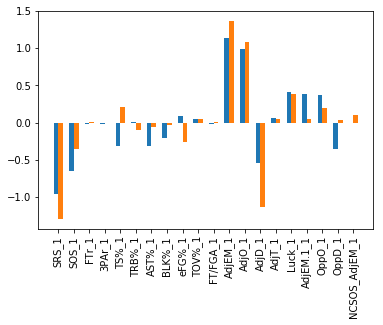

In [18]:
ndata=int(len(model.coef_[0])/2)
plt.bar(np.arange(ndata)-0.15, model.coef_[0][:ndata],width=0.3)
plt.bar(np.arange(ndata)+.15, -model.coef_[0][ndata:],width=0.3)
labels=dfClean.keys();
plt.xticks(np.arange(ndata), labels, rotation='vertical');


# Show logistic regression plot

In [19]:
def logit(x):
    return 1./(1.+np.exp(-x))
# logit(X_test.dot(model.coef_.T)).values-model.predict_proba(X_test)[:,1,None]

(-5, 5)

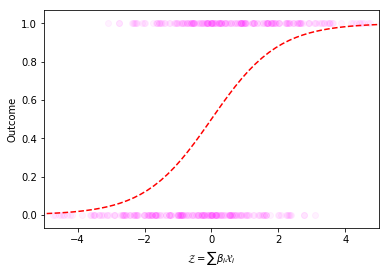

In [26]:
xcoord = X_test.dot(model.coef_.T)
plt.scatter(xcoord, y_test,color=[1,0,1,.05])
plt.scatter(-xcoord, 1-y_test,color=[1,0,1,.05])
plt.xlabel('${\cal Z}=\sum \\beta_i {\cal X}_i$')
plt.ylabel('Outcome')
x=np.linspace(-10,10,100)
plt.plot(x,logit(x),'r--')
plt.xlim(-5,5)

## Confusion Matrix


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test,np.round(y_predPythag))

ValueError: Found input variables with inconsistent numbers of samples: [221, 265]

In [29]:

confusion_matrix(y_test,y_pred)

array([[ 43,  37],
       [ 23, 118]])

In [165]:
rf=RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.75113122171945701

In [166]:
resDF.plot(x='Log reg',y='Pythag',kind='scatter')
plt.xlim(0,1)
plt.ylim(0,1)

NameError: name 'resDF' is not defined

# Test with teams split by k-means and PCA

In [107]:
resultList=[]
for yr in np.arange(2017,2003,-1):
    year=str(yr)
    teamType=pd.read_csv('data/team_type_'+year+'.csv')
    teamTypeDict={}
    for r in teamType.values:
        teamTypeDict[r[0]]=r[1]

    df=pd.read_csv('data/games/all_games_'+year+'.csv',index_col=0).dropna(axis=1)
    # df=pd.read_csv('data/games/tourn_games_2016.csv',index_col=0)
    # y=df['outcome']
    dropLabels=['School_1','Conf_1','wpct_1','Rank_1','WL_1','sched_url_1',\
                'School_2','Conf_2','wpct_2','Rank_2','WL_2','sched_url_2', 'outcome']

    y=df['outcome']


    types=[]
    for r in df.itertuples():

        t1=teamTypeDict[r.School_1]
        t2=teamTypeDict[r.School_2]

        types.append(str(min(t1,t2))+str(max(t1,t2)))

    df['types']=types

    runsum=0
    numsum=0
    pythsum=0

    nlab=3
    for t1lab in range(nlab):
        for t2lab in np.arange(t1lab,nlab):
            lab = str(t1lab)+str(t2lab)

            dfSel = df[(df.types==lab)]
            dropLabels.append('types')

            X=dfSel.drop(dropLabels,axis=1)
            y=dfSel['outcome']


            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
            logreg = LogisticRegression()
            logreg.fit(X_train, y_train)

            y_pred=logreg.predict(X_test)
            print(lab,len(y_pred))
            print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


            y_predPythag=pythagGame(X_test)

            print('Accuracy using pythagorean win expectation: ',(np.round(y_predPythag)==y_test).sum()/len(y_test))


            kfold = model_selection.KFold(n_splits=10, random_state=7)
            modelCV = LogisticRegression()
            scoring = 'accuracy'
            results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
            print("10-fold cross validation average accuracy: %.3f" % (results.mean()))    

            runsum+= len(y_pred) * results.mean() #logreg.score(X_test, y_test)
            numsum+= len(y_pred)
            pythsum+= len(y_pred) *(np.round(y_predPythag)==y_test).sum()/len(y_test)



    print ()
    print (runsum/numsum)
    print (pythsum/numsum)
    
    resultList.append([year,(runsum/numsum),pythsum/numsum])
    
resDFKM=pd.DataFrame(resultList,columns=['year','Log reg','Pythag'])


00 613
Accuracy of logistic regression classifier on test set: 0.67
Accuracy using pythagorean win expectation:  0.68515497553
10-fold cross validation average accuracy: 0.669
01 281
Accuracy of logistic regression classifier on test set: 0.84
Accuracy using pythagorean win expectation:  0.79359430605
10-fold cross validation average accuracy: 0.830
02 940
Accuracy of logistic regression classifier on test set: 0.77
Accuracy using pythagorean win expectation:  0.76170212766
10-fold cross validation average accuracy: 0.754
11 388
Accuracy of logistic regression classifier on test set: 0.65
Accuracy using pythagorean win expectation:  0.682989690722
10-fold cross validation average accuracy: 0.669
12 287
Accuracy of logistic regression classifier on test set: 0.92
Accuracy using pythagorean win expectation:  0.91637630662
10-fold cross validation average accuracy: 0.922
22 530
Accuracy of logistic regression classifier on test set: 0.70
Accuracy using pythagorean win expectation:  0.6943

10-fold cross validation average accuracy: 0.627
12 638
Accuracy of logistic regression classifier on test set: 0.82
Accuracy using pythagorean win expectation:  0.815047021944
10-fold cross validation average accuracy: 0.799
22 674
Accuracy of logistic regression classifier on test set: 0.68
Accuracy using pythagorean win expectation:  0.695845697329
10-fold cross validation average accuracy: 0.650

0.734948243054
0.771009174312
00 612
Accuracy of logistic regression classifier on test set: 0.64
Accuracy using pythagorean win expectation:  0.62091503268
10-fold cross validation average accuracy: 0.644
01 431
Accuracy of logistic regression classifier on test set: 0.88
Accuracy using pythagorean win expectation:  0.867749419954
10-fold cross validation average accuracy: 0.845
02 646
Accuracy of logistic regression classifier on test set: 0.77
Accuracy using pythagorean win expectation:  0.78173374613
10-fold cross validation average accuracy: 0.764
11 406
Accuracy of logistic regressio

In [109]:
resDFKM.mean()

year       1.440858e+54
Log reg    7.391709e-01
Pythag     7.464952e-01
dtype: float64

In [116]:

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.578


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
# logreg = LogisticRegression(C=1,penalty='l1',tol=0.1)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.70


In [11]:
df['pythag']=pythagGame(df)

In [15]:
y_predPythag=pythagGame(X_test)

print('Accuracy using pythagorean win expectation: ',(np.round(y_predPythag)==y_test).sum()/len(y_test))
# print(len(y_test))

Accuracy using pythagorean win expectation:  0.739459815547
